<a href="https://colab.research.google.com/github/deep38199patel/Fraud-Detection-/blob/main/Fraud_Detection_in_Multi_Factor_Authentication_(MFA)_Using_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Dependencies

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score



In [ ]:
# loading the dataset to Pandas DataFrame
credit_card_data = pd.read_csv('/content/creditcard.csv')

In [ ]:
credit_card_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [ ]:
# first 5 row of the dataset
credit_card_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [ ]:
#dataset info
credit_card_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
# checking number of missing values in each column
credit_card_data.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [ ]:
# distribution of legit transactions & fraud transcations
credit_card_data['Class'].value_counts()

,count
Class,
0,284315
1,492


this dataset is high unbalanced

0- normal transaction
1= fraud transaction

In [ ]:
from operator import length_hint
#separte the data for analysis
legit = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]

In [ ]:
print (legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [ ]:
#statsically measure of the data
legit.Amount.describe()

,Amount
count,284315.000000
mean,88.291022
std,250.105092
min,0.000000
25%,5.650000
50%,22.000000
75%,77.050000
max,25691.160000


In [ ]:
fraud.Amount.describe()


,Amount
count,492.000000
mean,122.211321
std,256.683288
min,0.000000
25%,1.000000
50%,9.250000
75%,105.890000
max,2125.870000


In [ ]:
#compare values for both transaction
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


Under : Sampling data

Building a sample dataset similar of normal transaction and fraud transaction

Number of fraud transaction


In [ ]:
legit_sample = legit.sample(n=492)

Concate the two dataframe

In [ ]:
new_dataset = pd.concat([legit_sample, fraud], axis=0)


In [ ]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
243824,152089.0,-0.515865,-0.603644,-0.895029,0.439801,1.921068,0.072302,0.318456,-0.855620,-0.191520,...,1.152518,0.082425,-1.926389,-0.931463,0.242198,-0.574227,0.269484,0.374559,366.00,0
190358,128800.0,-0.774658,0.849836,0.187144,-0.976735,0.960854,-1.395149,1.048829,-0.220234,0.192968,...,-0.150820,-0.125005,-0.230354,-0.076913,-0.084423,-0.103919,0.506903,0.253122,0.00,0
65121,51439.0,-1.036776,0.095477,2.170637,-0.442114,0.397381,1.272597,-0.287590,0.623862,0.349339,...,0.365110,1.281019,0.006079,-0.558635,-0.784150,0.446463,0.088629,0.148480,23.00,0
198201,132378.0,-0.309823,1.610452,-0.889071,4.152905,1.838497,1.782812,0.634523,0.733484,-2.714987,...,0.408515,1.336616,-0.018714,-1.588371,-0.908007,0.565927,0.417926,0.200631,32.62,0
243532,151967.0,-1.359061,1.968678,-1.589107,-0.576469,-0.223462,-0.730796,-0.274470,1.220394,-0.393630,...,-0.093074,-0.821120,0.293623,0.626077,-0.481797,0.045196,-0.711463,-0.123359,9.21,0


In [ ]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [ ]:
new_dataset['Class'].value_counts()

,count
Class,
0,492
1,492


In [ ]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,97325.611789,0.007655,-0.094954,-0.130845,0.061709,-0.041535,0.071708,0.133640,-0.111649,-0.019733,...,0.079052,-0.051528,0.005714,-0.024683,-0.072977,-0.014890,-0.011703,0.020866,-0.000385,128.763557
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


Split the data in to feature & targets

In [ ]:

X = new_dataset.drop(columns='Class', axis=1)
Y = new_dataset['Class']

In [ ]:
print (X)

            Time        V1        V2        V3        V4        V5        V6  \
243824  152089.0 -0.515865 -0.603644 -0.895029  0.439801  1.921068  0.072302   
190358  128800.0 -0.774658  0.849836  0.187144 -0.976735  0.960854 -1.395149   
65121    51439.0 -1.036776  0.095477  2.170637 -0.442114  0.397381  1.272597   
198201  132378.0 -0.309823  1.610452 -0.889071  4.152905  1.838497  1.782812   
243532  151967.0 -1.359061  1.968678 -1.589107 -0.576469 -0.223462 -0.730796   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [ ]:
print (Y)

243824    0
190358    0
65121     0
198201    0
243532    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


Split data in to trained data & testing data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [ ]:
print (X.shape, X_train.shape, X_test.shape)

(984, 30) (787, 30) (197, 30)


Model Training:
Logistic Regression

In [ ]:
model = LogisticRegression()

In [ ]:
#training logistic regression model with training data
model.fit(X_train, Y_train)

LogisticRegression()

In [ ]:
#accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [ ]:
print('Accuracy on training data:', training_data_accuracy )

Accuracy on training data: 0.928843710292249


In [ ]:
#accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [ ]:
print('Accuracy on test data:', test_data_accuracy )

Accuracy on test data: 0.9137055837563451


In [103]:
!pip install matplotlib-venn


In [104]:
!apt-get -qq install -y libfluidsynth1

E: Package 'libfluidsynth1' has no installation candidate


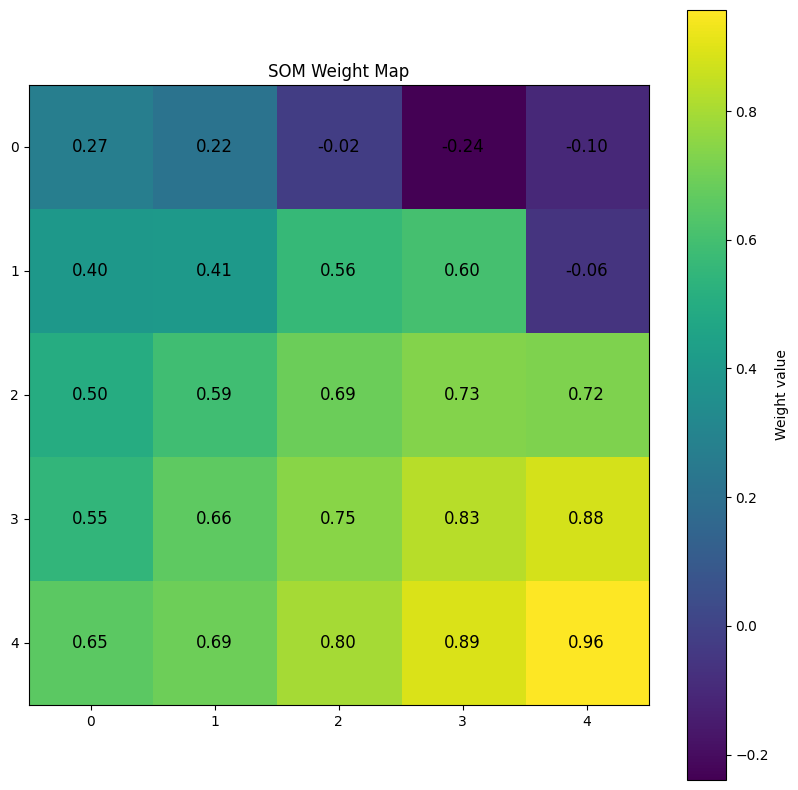

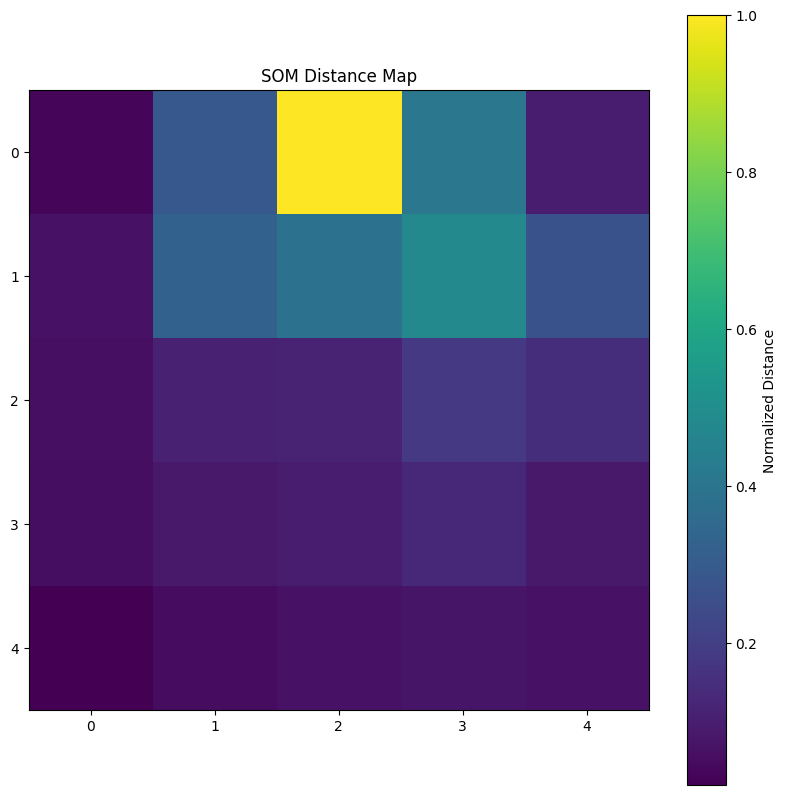

In [108]:
import matplotlib.pyplot as plt

def plot_som_weights(som):
    """ Plot the SOM weight map. """
    plt.figure(figsize=(10, 10))
    for i in range(som.weights.shape[0]):
        for j in range(som.weights.shape[1]):
            plt.text(j, i, f"{som.weights[i, j, 0]:.2f}", ha='center', va='center', fontsize=12)
    plt.imshow(som.weights[:, :, 0], cmap='viridis', interpolation='nearest')
    plt.colorbar(label='Weight value')
    plt.title('SOM Weight Map')
    plt.show()

def plot_distance_map(som):
    """ Plot the SOM distance map. """
    distance_map = som.distance_map()
    plt.figure(figsize=(10, 10))
    plt.imshow(distance_map, cmap='viridis', interpolation='nearest')
    plt.colorbar(label='Normalized Distance')
    plt.title('SOM Distance Map')
    plt.show()

# Example usage with a MiniSom instance
if __name__ == "__main__":
    # Initialize SOM
    som = MiniSom(5, 5, 2, sigma=1.0, learning_rate=0.5, random_seed=1)

    # Create some random data for training
    data = random.rand(100, 2)

    # Train SOM
    som.train_random(data, 100)

    # Plot weights and distance map
    plot_som_weights(som)
    plot_distance_map(som)
